## CodeNation Challenge: Prediction of the Math Grades of Students in Enem 2016

Competition Description here: https://www.codenation.com.br/journey/data-science/challenge/enem-2.html

In [176]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
# Import csv's
df_train = pd.read_csv(r"C:\Users\wesle\codenation\enem-2\train.csv")
df_test= pd.read_csv(r"C:\Users\wesle\codenation\enem-2\test.csv")

In [178]:
#Take a look at the data
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [179]:
# Drop Different Columns from train and test
target = 'NU_NOTA_MT'
print('\nTrain and Test Datasets have the same columns?:',
      df_train.drop(target,axis=1).columns.tolist()==df_test.columns.tolist())
print("\nVariables not in test but in train : ", 
      set(df_train.drop(target,axis=1).columns).difference(set(df_test.columns)))
dif = list(set(df_train.drop(target,axis=1).columns).difference(set(df_test.columns)))

df_train.drop(dif,axis=1,inplace=True)


Train and Test Datasets have the same columns?: False

Variables not in test but in train :  {'Q050', 'CO_UF_NASCIMENTO', 'TX_GABARITO_MT', 'Q028', 'Q015', 'Q049', 'Q037', 'IN_GUIA_INTERPRETE', 'Q038', 'TX_RESPOSTAS_CN', 'SG_UF_NASCIMENTO', 'TP_PRESENCA_MT', 'Q010', 'Q030', 'TP_LOCALIZACAO_ESC', 'Q019', 'IN_MESA_CADEIRA_RODAS', 'Q035', 'CO_ESCOLA', 'Q042', 'IN_VISAO_MONOCULAR', 'NO_MUNICIPIO_NASCIMENTO', 'IN_MEDIDOR_GLICOSE', 'Q008', 'TP_ESTADO_CIVIL', 'NO_MUNICIPIO_PROVA', 'Q016', 'IN_BRAILLE', 'Q020', 'Q045', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MARCA_PASSO', 'CO_UF_ENTIDADE_CERTIFICACAO', 'IN_PROVA_DEITADO', 'CO_MUNICIPIO_RESIDENCIA', 'IN_LAMINA_OVERLAY', 'NO_MUNICIPIO_RESIDENCIA', 'Q003', 'IN_CADEIRA_CANHOTO', 'Q012', 'Q018', 'TX_GABARITO_CN', 'IN_SOROBAN', 'IN_AMPLIADA_24', 'TX_RESPOSTAS_LC', 'TP_SIT_FUNC_ESC', 'IN_DEFICIENCIA_MENTAL', 'Unnamed: 0', 'SG_UF_ENTIDADE_CERTIFICACAO', 'IN_TRANSCRICAO', 'TX_GABARITO_LC', 'SG_UF_ESC', 'Q013', 'Q031', 'Q005', 'Q041', 'CO_MUNICIPIO_ESC', 'Q007

In [180]:
df_train.shape

(13730, 48)

In [181]:
df_test.shape

(4576, 47)

In [182]:
# Check Columns with constant values
dropcols_train = [c for c in df_train.columns if (df_train[c].nunique()==1) & (df_train[c].isnull().sum() == 0)]
dropcols_train

['IN_CEGUEIRA']

In [183]:
#Columns to be dropped
cols_to_drop = dropcols_train + ['NU_INSCRICAO']

In [184]:
# Store and Drops Id's from datasets, and Target from Train Dataset
ID = 'NU_INSCRICAO'
y_train = df_train[target].values
train_id = df_train[ID].values
test_id = df_test[ID].values

In [185]:
#Merge Data before preprocessing:
df_merge = pd.concat([df_train.drop(target,axis=1),df_test],axis=0)
df_merge.drop(cols_to_drop,axis=1,inplace=True)

In [186]:
#Missing Data on Merge Dataset
total = df_merge.isnull().sum().sort_values(ascending=False)
percent = (df_merge.isnull().sum()/df_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TP_ENSINO,12544,0.685240
TP_DEPENDENCIA_ADM_ESC,12544,0.685240
Q027,9861,0.538676
TP_STATUS_REDACAO,4796,0.261991
NU_NOTA_COMP4,4796,0.261991
NU_NOTA_LC,4796,0.261991
NU_NOTA_COMP1,4796,0.261991
NU_NOTA_COMP2,4796,0.261991
NU_NOTA_COMP3,4796,0.261991
NU_NOTA_COMP5,4796,0.261991


### Filling Missing Data

In [187]:
df_merge['TP_ENSINO'].fillna(4,inplace=True) #'4' will represent the NaN class of this feature
df_merge['TP_DEPENDENCIA_ADM_ESC'].fillna(5,inplace=True) #'5' will represent the NaN class of this feature
df_merge['Q027'].fillna('None',inplace=True) #'None' will represent the NaN class of this feature

In [188]:
print('Missing Data on NU_NOTA_MT:',df_train[target].isnull().sum())
print('Missing Data on NU_NOTA_CN:',df_train['NU_NOTA_CN'].isnull().sum())
print('Missing Data on NU_NOTA_CH:',df_train['NU_NOTA_CH'].isnull().sum())
print('Missing Data on NU_NOTA_REDACAO:',df_train['NU_NOTA_REDACAO'].isnull().sum())

Missing Data on NU_NOTA_MT: 3597
Missing Data on NU_NOTA_CN: 3389
Missing Data on NU_NOTA_CH: 3389
Missing Data on NU_NOTA_REDACAO: 3597


We can see that the NaN's are equal in NU_NOTA_MT and NU_NOTA_REDACAO, probably because these tests were applied in the same day. Therefore, we are not going to train our model in those days. We will use the feature 'TP_STATUS_REDACAO' to tell which rows we need to drop in df_train and df_test, because the NaN's from this feature indicates the examples which the student missed the Math/Redacao test day.

In [189]:
# Restore datraframes df_train and df_test
df_train = df_merge[:len(df_train)]
df_train[target] = y_train.tolist()
df_test = df_merge[len(df_train):]
df_test[ID] = test_id
df_train[ID] = train_id

Store the examples in Test dataset which our answer will be NaN based on 'TP_STATUS_REDACAO':

In [190]:
# Store ID's of Test Dataset which we will set the prediction result as NaN
NaNs_ID = df_test.loc[df_test['TP_STATUS_REDACAO'].isnull(),ID]
df_test = df_test[~df_test['TP_STATUS_REDACAO'].isnull()] #Remove those examples from test dataset
df_train = df_train[~df_train['TP_STATUS_REDACAO'].isnull()] #Remove those examples from train dataset
NaNs_ID

3       70b682d9a3636be23f6120fa9d6b164eb3c6002d
10      8b7c167ea7b55c8168ec60c3851b1b598a8fbd11
11      db4da599aab5bb08dce27094a35fd3e36cd0abce
16      fbfa8cde21a692b51fb86342110b4a334a0fcfdb
17      ca8477c8493b09f34d17bb287f9bacf2dd744c32
18      8b0c675d7fde14953668269d378c588f0df0498b
21      d30d31c8ff45094e9a992c63d4a6f68b245a341a
22      c0c6a803c271a955a7085a59cd3d4d43bcf7a1a6
29      153eebe4d270fe850d2ede7f53cbc81a6f4ddf91
30      a4e821c6f16fdae0a26cbbb7018b75812dfd074b
44      24550edb10f283ef4e953fd6a8fedbfa211bd456
50      65bba36aa15f0c4ef3562ea56c125d931bc4ed63
51      1045c54b5ea9f6e08454ec57c47e4ce0e33190bd
59      5357b6c09be4c7f3829b72f80de846a9228253cb
61      226b53de56347e3f9b52c8e0ab811fb82e96b3fb
62      089613ac7dca24109f84c72a97c83b2768b1df1c
63      527773409bf373301dbd835e59a263c035c043b8
64      45c95a1640ada5c9206fde19c4ccf68929c5ec0c
69      1b72da5bb82cc150ecfe71218c02f155d694230b
70      e429507efe1c2680cc464481850117d17083cd88
74      c8762fee25b0

**Re-merging:** Now we can Re-Merge the datasets into the df_merge DataFrame and end our data-processing steps:

In [191]:
y_train = df_train[target].values
test_id = df_test[ID].values
df_merge = pd.concat([df_train.drop(target,axis=1),df_test],axis=0)
df_merge.drop(ID,axis=1,inplace=True)

Let's check again the missing data on df_merge

In [192]:
total = df_merge.isnull().sum().sort_values(ascending=False)
percent = (df_merge.isnull().sum()/df_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
NU_NOTA_CN,53,0.003923
NU_NOTA_CH,53,0.003923
Q047,0,0.000000
TP_DEPENDENCIA_ADM_ESC,0,0.000000
IN_IDOSO,0,0.000000
IN_GESTANTE,0,0.000000
IN_SABATISTA,0,0.000000
IN_DISCALCULIA,0,0.000000
IN_DISLEXIA,0,0.000000
IN_SURDEZ,0,0.000000


So there are still two features with missing values, 'NU_NOTA_CN' and 'NU_NOTA_CH'. These features are the grades of the tests applied in the same day, so they have the exact same number of NaNs. As they are numeric features, we will treat these NaNs with the value -100.

In [193]:
df_merge['NU_NOTA_CN'].fillna(-100,inplace=True)
df_merge['NU_NOTA_CH'].fillna(-100,inplace=True)

In [194]:
print('\nIs there any NaN value  left in the dataset?:',df_merge.isnull().sum().any())


Is there any NaN value  left in the dataset?: False


### LabelEncoder of the categorical values

In [195]:
qualitative_features = [f for f in df_merge.columns 
                        if (df_merge[f].dtypes == object) | (df_merge[f].dtypes == bool)] #Lista de Features Qualitativas.
quantitative_features = [f for f in df_merge.dropna().columns 
                         if (df_merge[f].dtypes != object) & (df_merge[f].dtypes != bool)] #Lista de Features Qualitativas.

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)
### Encoding the variable
fit = df_merge[qualitative_features].apply(lambda x: d[x.name].fit_transform(x))
df_merge[qualitative_features] = fit

### Restore datraframes df_train and df_test

In [196]:
df_train = df_merge[:len(df_train)]
df_train[target] = y_train.tolist()
df_test = df_merge[len(df_train):]

### Division between X_train,X_val,y_train,y_val

In [197]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

size_test = 0.3
df_train = shuffle(df_train) #shuffle data before division
train_target = df_train[target] # Just for code readibility
predictors = df_train.drop(target, axis=1)
X_train, X_val, y_train, y_val = train_test_split(predictors, 
                                                    train_target,
                                                    train_size=1-size_test, 
                                                    test_size=size_test, 
                                                    random_state=0)
X_test = df_test

### Create and Train LGBModel

In [202]:
# Custom function to run light gbm model
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "n_estimators":1000,
        "num_leaves" : 30,
        "min_child_samples" : 30,
        "learning_rate" : 0.005,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    print('\nTraining LGBM...')
    model = lgb.train(params, lgtrain, 8000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model

# Training the model #
pred_lgb, lgb_model = run_lgb(X_train, y_train, X_val, y_val, X_test)
y_train_lgb = lgb_model.predict(X_train)
y_val_lgb = lgb_model.predict(X_val)
print('End Training LGBM...')


Training LGBM...
Training until validation scores don't improve for 1000 rounds.
[100]	valid_0's rmse: 85.6746
[200]	valid_0's rmse: 78.8733
[300]	valid_0's rmse: 76.0276
[400]	valid_0's rmse: 74.8264
[500]	valid_0's rmse: 74.2558
[600]	valid_0's rmse: 73.9995
[700]	valid_0's rmse: 73.8985
[800]	valid_0's rmse: 73.8202
[900]	valid_0's rmse: 73.8042
[1000]	valid_0's rmse: 73.8294
Did not meet early stopping. Best iteration is:
[914]	valid_0's rmse: 73.8026
End Training LGBM...


### Feature Importance for LGBM

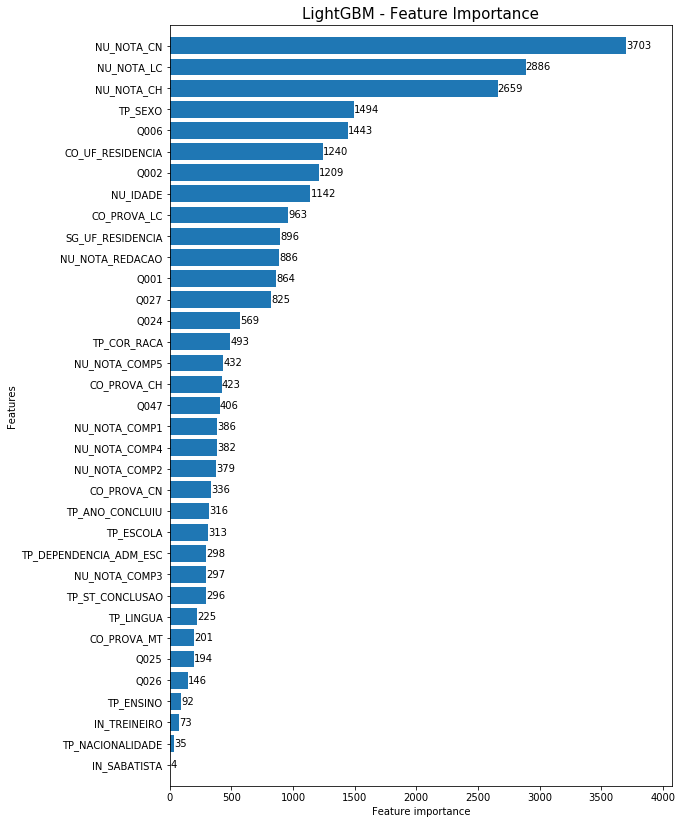

In [199]:
fig, ax = plt.subplots(figsize=(9,14))
lgb.plot_importance(lgb_model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

### Build Results DFs for plotting

In [200]:
df_resultado_train = pd.DataFrame(
        {
         'y_train':y_train.astype(float),
         'y_train_lgb':y_train_lgb.astype(float),
                })

df_resultado_val = pd.DataFrame(
        {
         'y_val':y_val.astype(float),  
         'y_val_lgb':y_val_lgb.astype(float),
                })

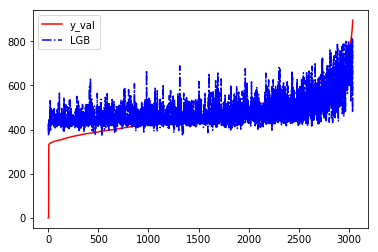

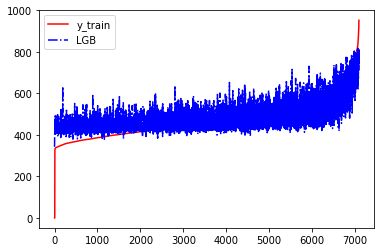

In [201]:
# Plots
import matplotlib.pyplot as plt
plt.figure(1)
df_resultado_val.sort_values('y_val_lgb',inplace=True)
df_resultado_val.sort_values('y_val',inplace=True)
plt.plot(df_resultado_val['y_val'].tolist(),'r',label='y_val')
plt.plot(df_resultado_val['y_val_lgb'].tolist(),'b-.',label='LGB')
plt.legend()

plt.figure(2)
df_resultado_train.sort_values('y_train_lgb',inplace=True)
df_resultado_train.sort_values('y_train',inplace=True)
plt.plot(df_resultado_train['y_train'].tolist(),'r-',label='y_train')
plt.plot(df_resultado_train['y_train_lgb'].tolist(),'b-.',label='LGB')
plt.legend()

### Conclusions and Notes

Our Model performance in blue is definately not Ideal, it is generalizing speacially badly at low values (close to zero). Maybe an  Outliers analisys could help our model with this particular behaviour. Another ML methods could be compared to LightGB aswell.

Another topic that could definatelly improve our model is feature engineering.

### Submission CSV File Creation

In [204]:
prediction = lgb_model.predict(X_test)

In [217]:
df_saida = pd.DataFrame(
        {'NU_INSCRICAO':list(test_id)+list(NaNs_ID),
         'NU_NOTA_MT':list(prediction)+[np.nan]*len(NaNs_ID)
                })

In [218]:
df_saida

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,439.001397
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,445.098701
2,b38a03232f43b11c9d0788abaf060f7366053b6d,571.141259
3,715494628a50142ce8cb17191cfe6d0f3cae0934,590.067191
4,e656d6bad65c93fb2880f1eba5037008c8e75774,484.928121
5,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,541.221829
6,11539e86171bf07d3a36f09377d7f54ebcc8406a,427.171950
7,043c544a2104aa8a9849f1a703a08d37a2f16839,469.954072
8,76ba050e64ad100b856f0eaabd8f539d5c7dd185,451.833573
9,940aede382ccb332fab15d413217695ec44ca765,461.858411


### Submit Solution

In [219]:
# df_saida.to_csv(r'C:\Users\wesle\codenation\enem-2/answer.csv',index=False)